In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
#pip install datasets

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("carblacac/twitter-sentiment-analysis", cache_dir= "C:/Users/salma/jupyter workbook/NLP")

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

In [6]:
df = pd.concat([pd.DataFrame(dataset['train']), pd.DataFrame(dataset['validation']), pd.DataFrame(dataset['test'])])

In [7]:
df.shape

(211983, 2)

In [8]:
data = df.copy()

In [9]:
data.drop_duplicates(subset=['text'], keep=False)
data.head()

,text,feeling
0,@fa6ami86 so happy that salman won. btw the 1...,0
1,@phantompoptart .......oops.... I guess I'm ki...,0
2,@bradleyjp decidedly undecided. Depends on the...,1
3,@Mountgrace lol i know! its so frustrating isn...,1
4,@kathystover Didn't go much of any where - Lif...,1


In [10]:
data.shape

(211983, 2)

In [11]:
#!pip install tweet-preprocessor

In [12]:
import preprocessor as p
data.text = [p.clean(tweet) for tweet in data.text]

In [13]:
data.head()

,text,feeling
0,so happy that salman won. btw the sec clip is ...,0
1,.......oops.... I guess I'm kinda out of it......,0
2,decidedly undecided. Depends on the situation....,1
3,lol i know! its so frustrating isnt it?!,1
4,Didn't go much of any where - Life took over f...,1


In [14]:
data['text'] = data['text'].str.lower()
data.head()

,text,feeling
0,so happy that salman won. btw the sec clip is ...,0
1,.......oops.... i guess i'm kinda out of it......,0
2,decidedly undecided. depends on the situation....,1
3,lol i know! its so frustrating isnt it?!,1
4,didn't go much of any where - life took over f...,1


In [15]:
data['text'] = data['text'].str.replace("[^a-zA-Z# ]", "",regex=True)
data.head()

,text,feeling
0,so happy that salman won btw the sec clip is t...,0
1,oops i guess im kinda out of it blonde moment ...,0
2,decidedly undecided depends on the situation w...,1
3,lol i know its so frustrating isnt it,1
4,didnt go much of any where life took over for...,1


In [16]:
#nltk.download('punkt') 

In [17]:
data['token'] = data['text'].apply(lambda x: x.split())
data.reset_index().head(10)

,index,text,feeling,token
0,0,so happy that salman won btw the sec clip is t...,0,"[so, happy, that, salman, won, btw, the, sec, ..."
1,1,oops i guess im kinda out of it blonde moment ...,0,"[oops, i, guess, im, kinda, out, of, it, blond..."
2,2,decidedly undecided depends on the situation w...,1,"[decidedly, undecided, depends, on, the, situa..."
3,3,lol i know its so frustrating isnt it,1,"[lol, i, know, its, so, frustrating, isnt, it]"
4,4,didnt go much of any where life took over for...,1,"[didnt, go, much, of, any, where, life, took, ..."
5,5,like questions she asks me the date etci say t...,1,"[like, questions, she, asks, me, the, date, et..."
6,6,i havent heard anything ill tweet you as soon ...,0,"[i, havent, heard, anything, ill, tweet, you, ..."
7,7,thx sharing,1,"[thx, sharing]"
8,8,thank you so much looking at these pics makes ...,0,"[thank, you, so, much, looking, at, these, pic..."
9,9,not it teh best form today dont no why just ha...,0,"[not, it, teh, best, form, today, dont, no, wh..."


In [18]:
#nltk.download('stopwords')

In [19]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word.lower() not in stop_words]

data['token'] = data['token'].apply(remove_stopwords)

In [20]:
data.head(10)

,text,feeling,token
0,so happy that salman won btw the sec clip is t...,0,"[happy, salman, btw, sec, clip, truely, teaser]"
1,oops i guess im kinda out of it blonde moment ...,0,"[oops, guess, im, kinda, blonde, moment, blush..."
2,decidedly undecided depends on the situation w...,1,"[decidedly, undecided, depends, situation, im,..."
3,lol i know its so frustrating isnt it,1,"[lol, know, frustrating, isnt]"
4,didnt go much of any where life took over for...,1,"[didnt, go, much, life, took]"
5,like questions she asks me the date etci say t...,1,"[like, questions, asks, date, etci, say, birmi..."
6,i havent heard anything ill tweet you as soon ...,0,"[havent, heard, anything, ill, tweet, soon, he..."
7,thx sharing,1,"[thx, sharing]"
8,thank you so much looking at these pics makes ...,0,"[thank, much, looking, pics, makes, want, one]"
9,not it teh best form today dont no why just ha...,0,"[teh, best, form, today, dont, pissy, day, way..."


In [21]:
st = nltk.PorterStemmer()
def stemming_on_text(token):
    text = [st.stem(word) for word in token]
    return text
data['stemming'] = data['token'].apply(lambda x: stemming_on_text(x))
data.head(10)

,text,feeling,token,stemming
0,so happy that salman won btw the sec clip is t...,0,"[happy, salman, btw, sec, clip, truely, teaser]","[happi, salman, btw, sec, clip, trueli, teaser]"
1,oops i guess im kinda out of it blonde moment ...,0,"[oops, guess, im, kinda, blonde, moment, blush...","[oop, guess, im, kinda, blond, moment, blush, ..."
2,decidedly undecided depends on the situation w...,1,"[decidedly, undecided, depends, situation, im,...","[decidedli, undecid, depend, situat, im, peopl..."
3,lol i know its so frustrating isnt it,1,"[lol, know, frustrating, isnt]","[lol, know, frustrat, isnt]"
4,didnt go much of any where life took over for...,1,"[didnt, go, much, life, took]","[didnt, go, much, life, took]"
5,like questions she asks me the date etci say t...,1,"[like, questions, asks, date, etci, say, birmi...","[like, question, ask, date, etci, say, birming..."
6,i havent heard anything ill tweet you as soon ...,0,"[havent, heard, anything, ill, tweet, soon, he...","[havent, heard, anyth, ill, tweet, soon, hear,..."
7,thx sharing,1,"[thx, sharing]","[thx, share]"
8,thank you so much looking at these pics makes ...,0,"[thank, much, looking, pics, makes, want, one]","[thank, much, look, pic, make, want, one]"
9,not it teh best form today dont no why just ha...,0,"[teh, best, form, today, dont, pissy, day, way...","[teh, best, form, today, dont, pissi, day, way..."


In [22]:
data['sentiment'] = data['stemming'].apply(lambda x: ' '.join(x) )
data.head(10)

,text,feeling,token,stemming,sentiment
0,so happy that salman won btw the sec clip is t...,0,"[happy, salman, btw, sec, clip, truely, teaser]","[happi, salman, btw, sec, clip, trueli, teaser]",happi salman btw sec clip trueli teaser
1,oops i guess im kinda out of it blonde moment ...,0,"[oops, guess, im, kinda, blonde, moment, blush...","[oop, guess, im, kinda, blond, moment, blush, ...",oop guess im kinda blond moment blush epic fail
2,decidedly undecided depends on the situation w...,1,"[decidedly, undecided, depends, situation, im,...","[decidedli, undecid, depend, situat, im, peopl...",decidedli undecid depend situat im peopl ill c...
3,lol i know its so frustrating isnt it,1,"[lol, know, frustrating, isnt]","[lol, know, frustrat, isnt]",lol know frustrat isnt
4,didnt go much of any where life took over for...,1,"[didnt, go, much, life, took]","[didnt, go, much, life, took]",didnt go much life took
5,like questions she asks me the date etci say t...,1,"[like, questions, asks, date, etci, say, birmi...","[like, question, ask, date, etci, say, birming...",like question ask date etci say birmingham lol...
6,i havent heard anything ill tweet you as soon ...,0,"[havent, heard, anything, ill, tweet, soon, he...","[havent, heard, anyth, ill, tweet, soon, hear,...",havent heard anyth ill tweet soon hear im real...
7,thx sharing,1,"[thx, sharing]","[thx, share]",thx share
8,thank you so much looking at these pics makes ...,0,"[thank, much, looking, pics, makes, want, one]","[thank, much, look, pic, make, want, one]",thank much look pic make want one
9,not it teh best form today dont no why just ha...,0,"[teh, best, form, today, dont, pissy, day, way...","[teh, best, form, today, dont, pissi, day, way...",teh best form today dont pissi day way happi d...


In [23]:
data.dtypes

text         object
feeling       int64
token        object
stemming     object
sentiment    object
dtype: object

(-0.5, 1599.5, 799.5, -0.5)

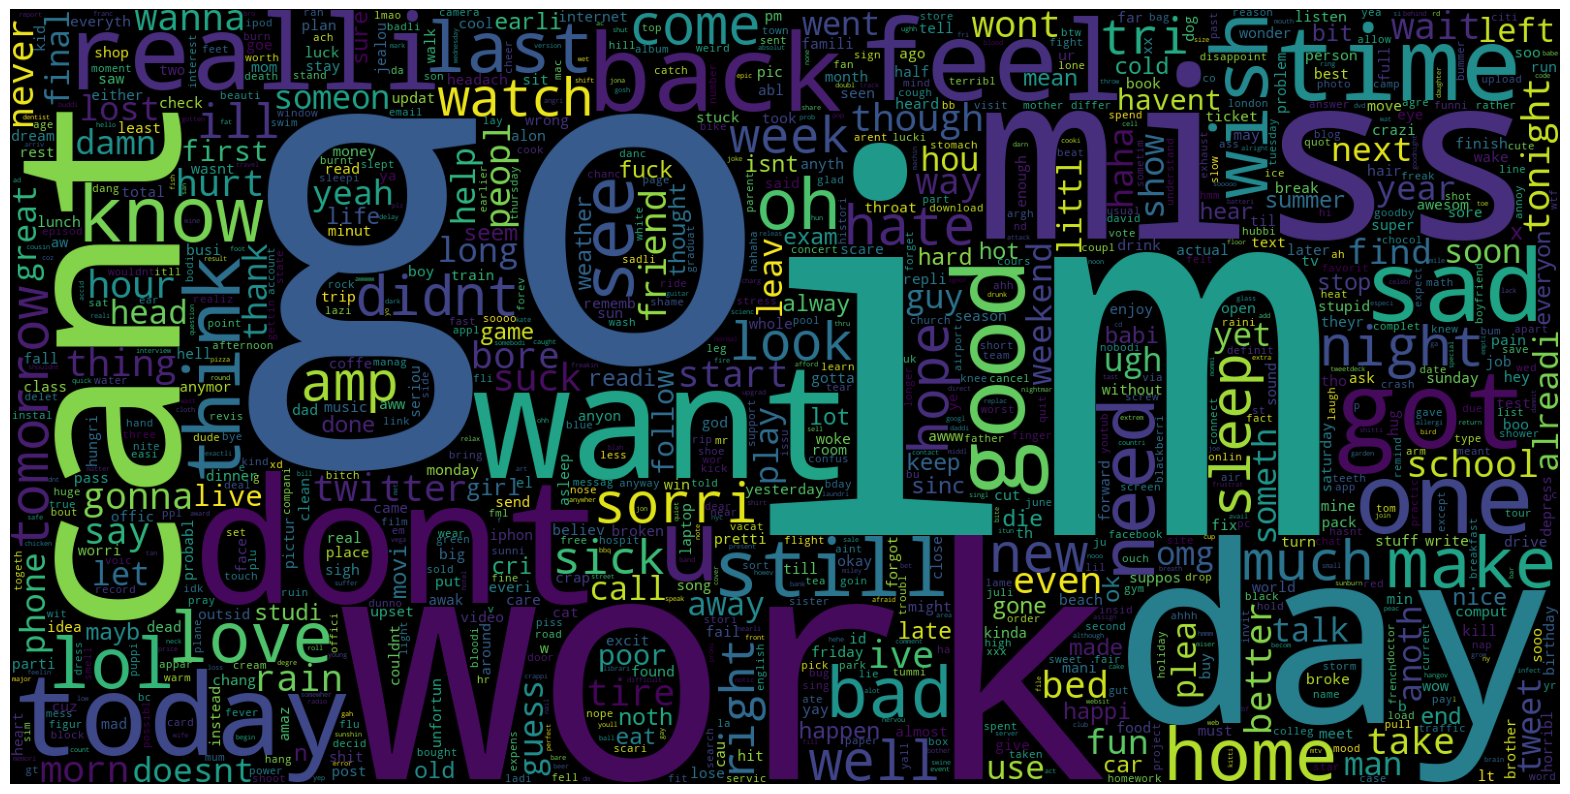

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['feeling']==0]['stemming'].apply(lambda x: ' '.join(x))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

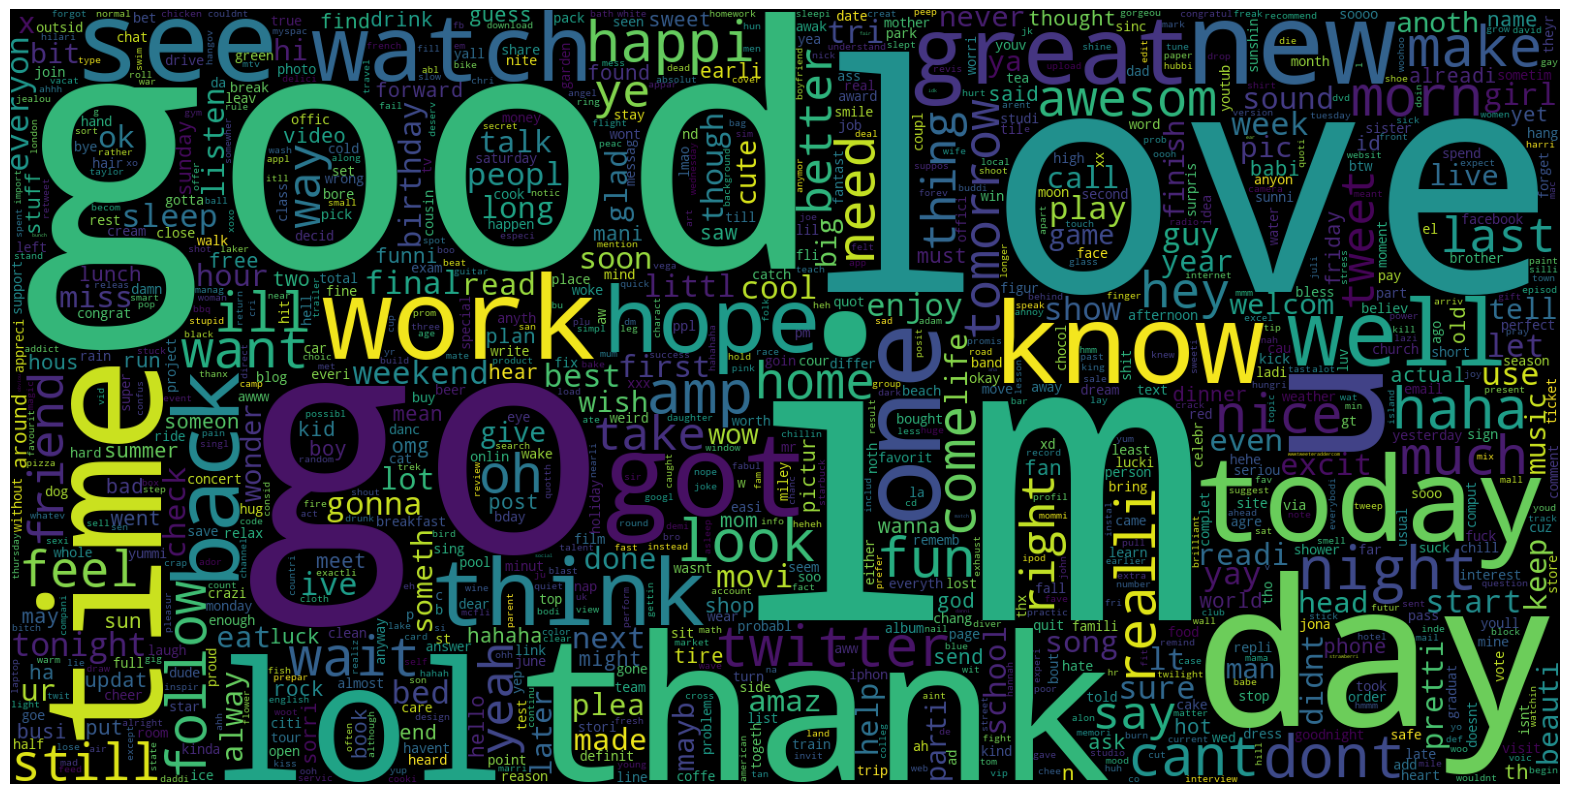

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['feeling']==1]['stemming'].apply(lambda x: ' '.join(x))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [26]:
X=data.text
y=data.feeling

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(211983,)
(169586,)
(42397,)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
tfidf.fit(X_train)

TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [29]:
X_train = tfidf.transform(X_train)
X_test  = tfidf.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(169586, 5000)
(42397, 5000)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
test_acc_nb=accuracy_score(y_test,naive_bayes_pred)
print(test_acc_nb)

0.7699365521145364


In [32]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
test_acc_lr = accuracy_score(y_test, logistic_reg_pred)
print(test_acc_lr)

0.7900559001816166


C:\Users\salma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

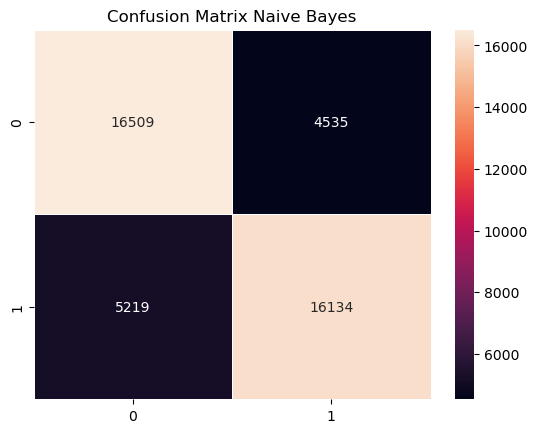

In [33]:
cfm=confusion_matrix(y_test,naive_bayes_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

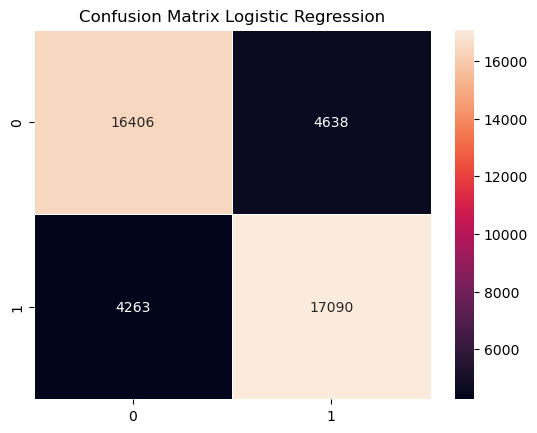

In [34]:
cfm=confusion_matrix(y_test,logistic_reg_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")

In [38]:
import os
import string
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, TextVectorization, Input, Embedding, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [39]:
txtVec = TextVectorization()

In [40]:
txtVec.adapt(data['sentiment'])

In [41]:
txtVec(txtVec.get_vocabulary())

<tf.Tensor: shape=(87289, 1), dtype=int64, numpy=
array([[    0],
       [    1],
       [    2],
       ...,
       [87286],
       [87287],
       [87288]], dtype=int64)>

In [42]:
vocSize = txtVec.vocabulary_size()
vocSize

87289

In [ ]:
txtVec(df['sentiment']).numpy()

In [43]:
netLSTM = Sequential()

netLSTM.add(Input(shape = (1, ), dtype = 'string'))
netLSTM.add(txtVec)
netLSTM.add(Embedding(vocSize, 2))
netLSTM.add(LSTM(8))
netLSTM.add(Dropout(0.4))
netLSTM.add(BatchNormalization())
netLSTM.add(Dense(4, activation='relu'))
netLSTM.add(Dense(1, activation = 'sigmoid'))

netLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 2)           174578    
                                                                 
 lstm (LSTM)                 (None, 8)                 352       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 4)                 3

In [45]:
netLSTM.compile(loss = 'binary_crossentropy', 
                metrics = ['accuracy'], 
                optimizer = Adam(learning_rate=0.001))

earlyStoppingCallback = EarlyStopping(monitor = 'loss', patience = 1, restore_best_weights = True)
fitLSTM = netLSTM.fit(data['sentiment'], data['feeling'], batch_size=128, validation_split=0.2, epochs = 20, callbacks = [earlyStoppingCallback])

Epoch 1/20
1325/1325 [==============================] - 17s 11ms/step - loss: 0.5390 - accuracy: 0.7293 - val_loss: 0.5012 - val_accuracy: 0.7630
Epoch 2/20
1325/1325 [==============================] - 13s 10ms/step - loss: 0.4613 - accuracy: 0.7894 - val_loss: 0.4982 - val_accuracy: 0.7601
Epoch 3/20
1325/1325 [==============================] - 13s 10ms/step - loss: 0.4213 - accuracy: 0.8135 - val_loss: 0.5090 - val_accuracy: 0.7557
Epoch 4/20
1325/1325 [==============================] - 14s 10ms/step - loss: 0.3940 - accuracy: 0.8285 - val_loss: 0.5497 - val_accuracy: 0.7450
Epoch 5/20
1325/1325 [==============================] - 13s 10ms/step - loss: 0.3726 - accuracy: 0.8390 - val_loss: 0.5311 - val_accuracy: 0.7469
Epoch 6/20
1325/1325 [==============================] - 14s 10ms/step - loss: 0.3578 - accuracy: 0.8448 - val_loss: 0.5569 - val_accuracy: 0.7423
Epoch 7/20
1325/1325 [==============================] - 13s 10ms/step - loss: 0.3471 - accuracy: 0.8498 - val_loss: 0.5679 -

In [46]:
accFcn = fitLSTM.history['accuracy']
valAccFcn = fitLSTM.history['val_accuracy']
lossFcn = fitLSTM.history['loss']
valLossFcn = fitLSTM.history['val_loss']

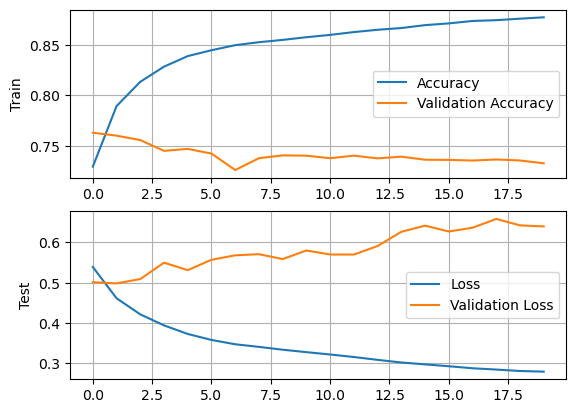

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(accFcn, label = "Accuracy")
ax1.plot(valAccFcn, label = "Validation Accuracy")
ax1.set_ylabel('Train')
ax1.grid("on")
ax1.legend()

ax2.plot(lossFcn, label = "Loss")
ax2.plot(valLossFcn, label = "Validation Loss")
ax2.set_ylabel('Test')
ax2.grid("on")
ax2.legend()

plt.show()